<a href="https://colab.research.google.com/github/yashgarg-7/Machine-Learning/blob/master/ClothesClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0,23,23]

194

In [5]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

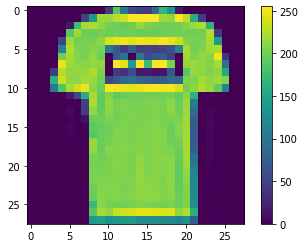

In [7]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()


In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [9]:
model=keras.Sequential([
      keras.layers.Flatten(input_shape=(28,28)),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(10, activation='softmax')
])

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(train_images,train_labels,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5002 - accuracy: 0.8239
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3745 - accuracy: 0.8657
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3364 - accuracy: 0.8774


In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3923 - accuracy: 0.8617


Pullover


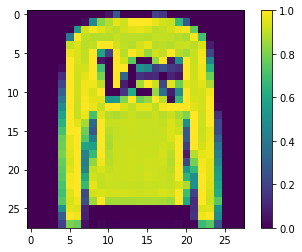

In [13]:
predictions=model.predict(test_images)
print(class_names[np.argmax(predictions[1])])
plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.grid(False)
plt.show()



Pick a number: 98
Expected:Coat
Guess: Coat


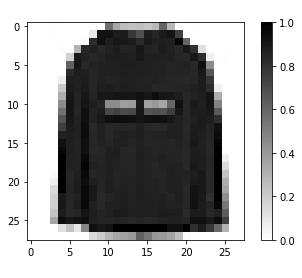

In [16]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  print("Expected:" + class_names[test_labels[num]])
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  print("Guess: " + class_names[np.argmax(predictions[num])])
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
